In [29]:
#First the imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline

In [30]:
#differentiation function
def diff(data,sampling_time=(1/512)):
    x_values=np.zeros((data.shape[0]))
    for i in range (1,x_values.shape[0]):
        x_values[i]= i
    derivative = np.zeros((data.shape[0]))
    for i in range(2,data.shape[0]-2):
        derivative[i]= (1/(8*sampling_time))*(-data[i-2]-2*data[i-1]+2*data[i+1]+data[i+2])
        
    return derivative



    

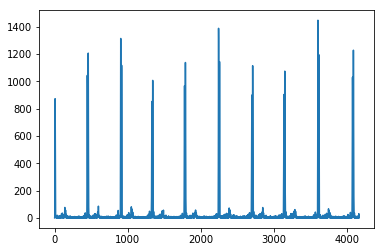

In [57]:
#smoothing function
def smoothing(squares,window_size=31):
    
    N=window_size
    smooth=np.zeros((squares.shape[0]))
    for i in range(N//2,(squares.shape[0]-(N//2))):
        
        sum=0
        for j in range (i-(N//2), i+(N//2)):
            
            sum=sum+squares[j]
        smooth[i]=(1/N)*sum
    return smooth

# data = np.loadtxt("Data1.txt", delimiter=" ")
# deriv=diff(data)
# squares=deriv**2
# plt.plot(range(0,data.shape[0]),squares)
    

In [69]:
#function to compute autocorrelation
def my_autocorrelation(data):
    result=np.zeros((data.shape[0]))
    
    for m in range(data.shape[0]):
        
        for i in range(1,data.shape[0]-m):
            result[m]=result[m]+data[i]*data[i+m]
    return result

##OF just use the python function //this one was added for testing but i'm using mine in the main code
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

        

In [68]:
#function to get the average time between beats
def get_heart_rate(autocorr_output,sampling_time=(1/512)):
    temp=autocorr_output[100:]
    average_RR = max(temp)
    avg_RR_index=0
    for i in range(autocorr_output.shape[0]):
        if autocorr_output[i]== average_RR:
            avg_RR_index=i
            print(i)
            break
    heart_rate=60/(avg_RR_index*sampling_time)
    return heart_rate

457
This Person's heart rate is:  67.22100656455142  bpm


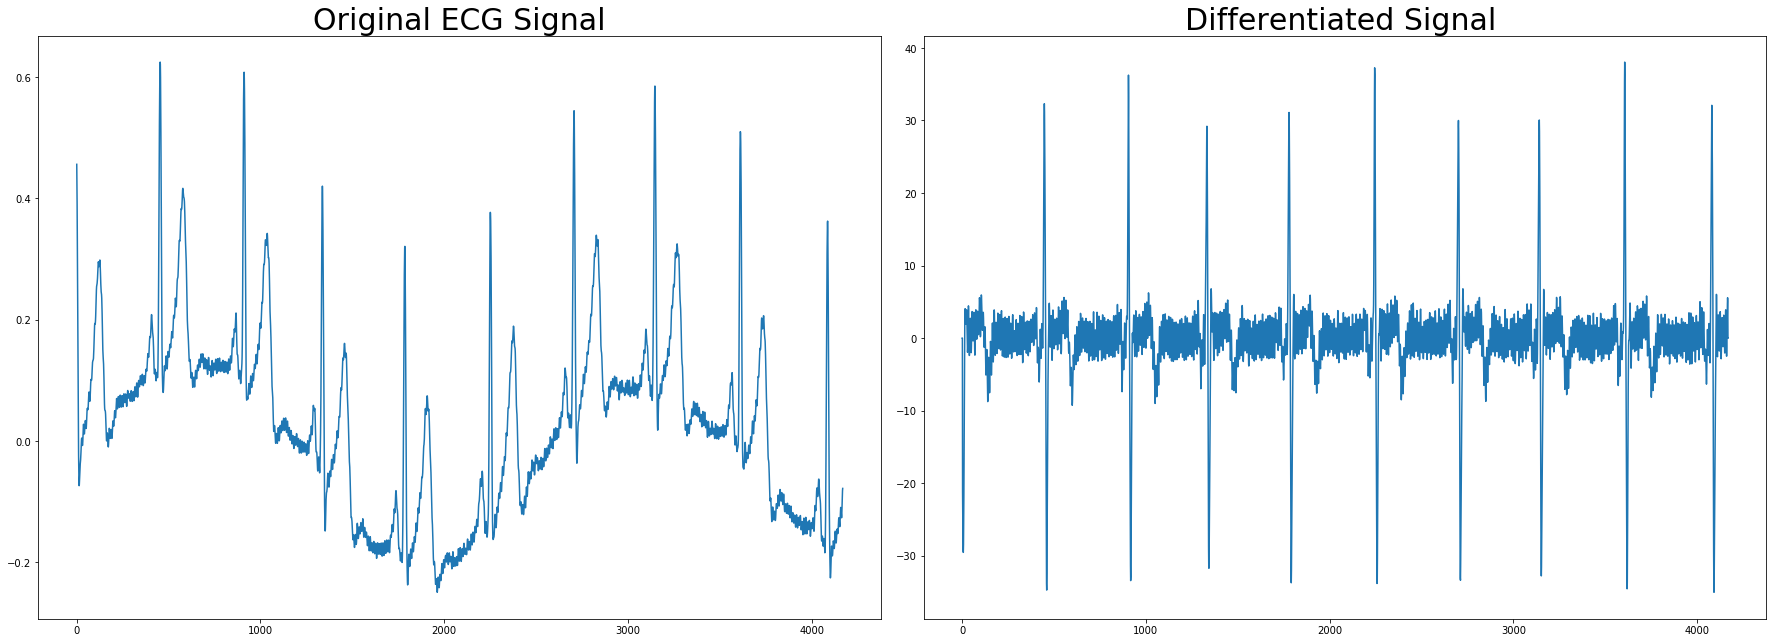

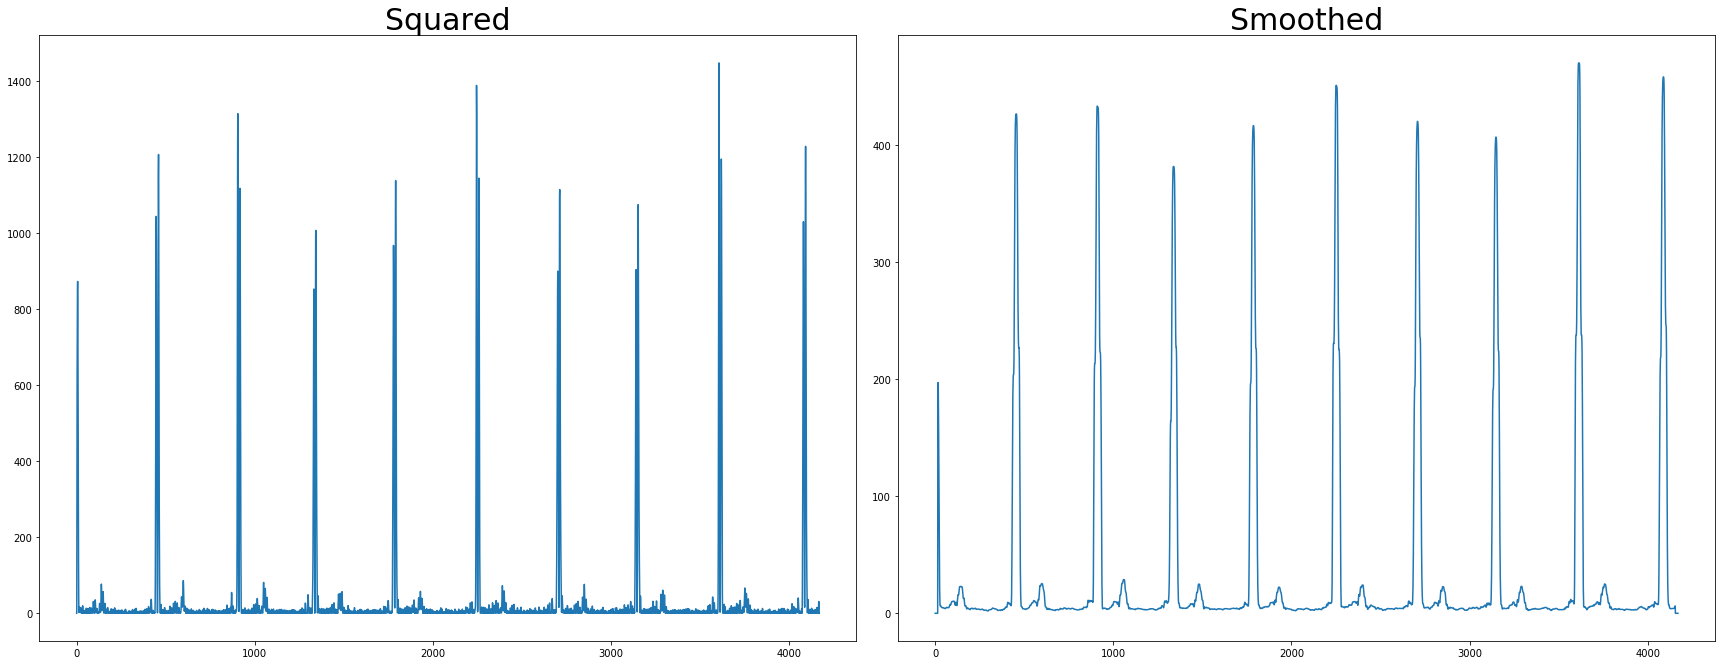

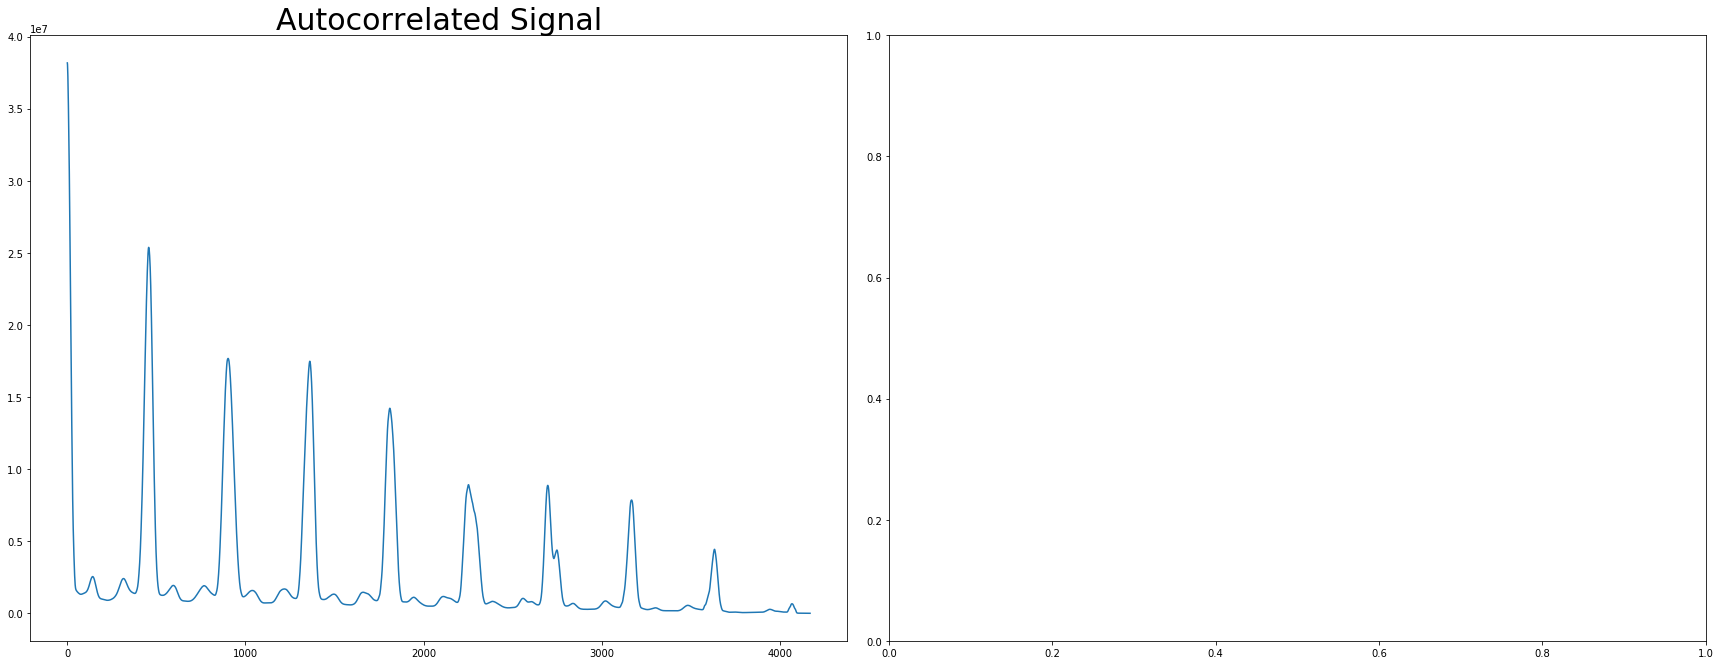

In [70]:
#Function to combine all of the above just return the heart rate
def ECG_Analysis(data_file_name,sampling_time=(1/512),window_size=31):
    
    data = np.loadtxt(data_file_name, delimiter=" ")
    deriv=diff(data,sampling_time)
    squares=deriv**2
    smooth=smoothing(squares,window_size)
    
    #print(squares,smooth)
    
    ac=my_autocorrelation(smooth)
    heart_rate=get_heart_rate(ac,sampling_time)
    
    #PLOTS
    x_values= range(0,data.shape[0])
    
    #___
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    
    ax1.plot(x_values,data)
    ax1.set_title('Original ECG Signal', fontsize=30)

    ax2.plot(x_values,deriv)
    ax2.set_title('Differentiated Signal ', fontsize=30)
    
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    #___
    
    f2, (ax3,ax4)=plt.subplots(1,2,figsize=(24,9))
    f2.tight_layout()
    
    ax3.plot(x_values,squares)
    ax3.set_title('Squared',fontsize=30)
    
    ax4.plot(x_values,smooth)
    ax4.set_title('Smoothed',fontsize=30)
    #_____
    
    f3, (ax5,ax6)=plt.subplots(1,2,figsize=(24,9))
    f3.tight_layout()
    
    ax5.plot(x_values,ac)
    ax5.set_title('Autocorrelated Signal',fontsize=30)
    
    
    #___
    return heart_rate

print("This Person's heart rate is: ",ECG_Analysis("Data1.txt")," bpm")
    
    

    
    
    
    